Banks run into losses when customers don't pay their loans on time. Because of this, every year, banks have losses in crores, and this also impacts the country's economic growth to a large extent. In this hackathon, we look at various attributes such as funded amount, location, loan, balance, etc., to predict whether a person will be a loan defaulter.

ID - unique identifier for each loan application

Loan Amount - the amount requested by the borrower

Funded Amount - the amount funded by investors for the loan

Funded Amount Investor - the amount funded by investors for the loan

Term - the length of the loan term in months

Batch Enrolled - the batch enrollment method for the loan

Interest Rate - the interest rate on the loan

Grade - the Lending Club assigned loan grade

Sub Grade - the Lending Club assigned loan subgrade

Employment Duration - the employment length of the borrower

Home Ownership - the type of home ownership of the borrower

Verification Status - indicates if the borrower’s income was verified

Loan Title - the title of the loan as provided by the borrower

Debit to Income - the borrower’s debt-to-income ratio

Delinquency - two years - the number of times the borrower has been delinquent in the past two years

Inquires - six months - the number of inquiries made on the borrower’s credit in the past six months

Open Account - the number of open credit lines in the borrower's credit file

Public Record - the number of derogatory public records on the borrower's credit file

Revolving Balance - the balance on the borrower's revolving credit accounts

Revolving Utilities - the amount of the borrower's revolving credit that is currently in use

Total Accounts - the total number of credit lines the borrower has

Initial List Status - the initial listing status of the loan

Total Received Interest - total interest received to date

Total Received Late Fee - total late fees received to date

Recoveries - post charge off gross recovery

Collection Recovery Fee - post charge off collection fee

Collection 12 months Medical - number of collections in medical categories in the last 12 months

Application Type - indicates whether the loan is an individual or joint application

Last week Pay - the last week’s payment on the loan

Total Collection Amount - total amount due after the charged off

Total Current Balance - total current balance of all accounts

Total Revolving Credit Limit - total revolving credit limit

Loan Status - current status of the loan

Debt-to-Income Ratio - the borrower's debt-to-income ratio

Credit Utilization Ratio - the borrower's credit utilization ratio

Time Since Last Delinquency - the number of months since the borrower's last delinquency

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('train.csv')
train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [12]:
train['Debit to Income']

0        16.284758
1        15.412409
2        28.137619
3        18.043730
4        17.209886
           ...    
67458    28.105127
67459    17.694279
67460    10.295774
67461     7.614624
67462    16.052112
Name: Debit to Income, Length: 67463, dtype: float64

In [3]:
test=pd.read_csv('test.csv')
test.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,...,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,NaN
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,...,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,NaN
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,...,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,NaN
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,...,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,NaN
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,...,2.127835,0.402315,0,INDIVIDUAL,104,0,33,90825,26145,NaN


In [4]:
train.shape

(67463, 35)

we have 67463 rows and 35 columns

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [6]:
train.isnull().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

We have zero missing values


lets check on the number of unique values
 The unique() function returns all the unique values ​​of the column in the form of an array 
 
  The nunique() function returns the number of all unique values .

In [7]:
train.nunique()

ID                              67463
Loan Amount                     27525
Funded Amount                   24548
Funded Amount Investor          67441
Term                                3
Batch Enrolled                     41
Interest Rate                   67448
Grade                               7
Sub Grade                          35
Employment Duration                 3
Home Ownership                  67454
Verification Status                 3
Payment Plan                        1
Loan Title                        109
Debit to Income                 67454
Delinquency - two years             9
Inquires - six months               6
Open Account                       36
Public Record                       5
Revolving Balance               20582
Revolving Utilities             67458
Total Accounts                     69
Initial List Status                 2
Total Received Interest         67451
Total Received Late Fee         67380
Recoveries                      67387
Collection R

The payment plan and accounts deliquent have only 1 unique values;
lets drop this columns

In [8]:
train.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [9]:
train.drop(['Payment Plan','Accounts Delinquent'],axis=1,inplace=True)

We check on ratio of different faetures
Ratios can be valuable features in themselves. By creating new variables as ratios of existing variables, you can capture relationships or interactions between different features that might be relevant for the modeling task. 

Finding and utilizing ratios in data preparation can help address class imbalance, provide insights into proportions or percentages, normalize variables, and create new informative features. They can enhance the quality of the data used for modeling and improve the performance and interpretability of machine learning models.


In [10]:
#creating debt to income ratio
train['Debt-to-income Ratio']=train['Debit to Income']/train['Loan Amount']
train['Debt-to-income Ratio']

0        0.001628
1        0.004271
2        0.000995
3        0.001615
4        0.001019
           ...   
67458    0.002066
67459    0.002126
67460    0.000648
67461    0.000460
67462    0.001046
Name: Debt-to-income Ratio, Length: 67463, dtype: float64

In [11]:
#creating credit utilization ratio column
train['Credit Utilization Ratio']=train['Revolving Balance'] / train['Total Revolving Credit Limit']
train['Credit Utilization Ratio']

0        3.663091
1        0.038880
2        0.070465
3        0.229498
4        0.068382
           ...   
67458    0.119880
67459    1.117397
67460    0.051854
67461    0.029994
67462    0.132637
Name: Credit Utilization Ratio, Length: 67463, dtype: float64

In [14]:
# creating Time Since Last Deliquency Column
#Replace with the current year
current_year = 2023
train['Time Since Last Delinquency'] = current_year - train['Delinquency - two years']

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Loan Title                    67463 non-null  object 
 13  D

In [19]:
#lets check the correlation matrix
# Calculate the correlation matrix
corr_matrix = train.corr()

# Select the column corresponding to the target variable
target_corr = corr_matrix['Loan Status']


# Sort the correlations in descending order
sorted_correlations = target_corr.abs().sort_values(ascending=False)

# Print the top 10 most correlated features
print(sorted_correlations.head(48))

C:\Users\Anitah\AppData\Local\Temp\ipykernel_4816\2798447532.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


Loan Status                     1.000000
Public Record                   0.010590
Delinquency - two years         0.009990
Time Since Last Delinquency     0.009990
Total Current Balance           0.009828
Total Received Late Fee         0.009365
Debt-to-income Ratio            0.008044
Total Collection Amount         0.007892
Open Account                    0.007073
Last week Pay                   0.006117
Credit Utilization Ratio        0.005971
Loan Amount                     0.004473
Revolving Utilities             0.004120
Collection Recovery Fee         0.003828
Home Ownership                  0.003716
Term                            0.003410
Debit to Income                 0.003057
Interest Rate                   0.002900
Total Received Interest         0.001680
Total Revolving Credit Limit    0.001454
Funded Amount                   0.001364
Revolving Balance               0.001073
Collection 12 months Medical    0.000686
Recoveries                      0.000652
Inquires - six m

In [ ]:
#using seaborn

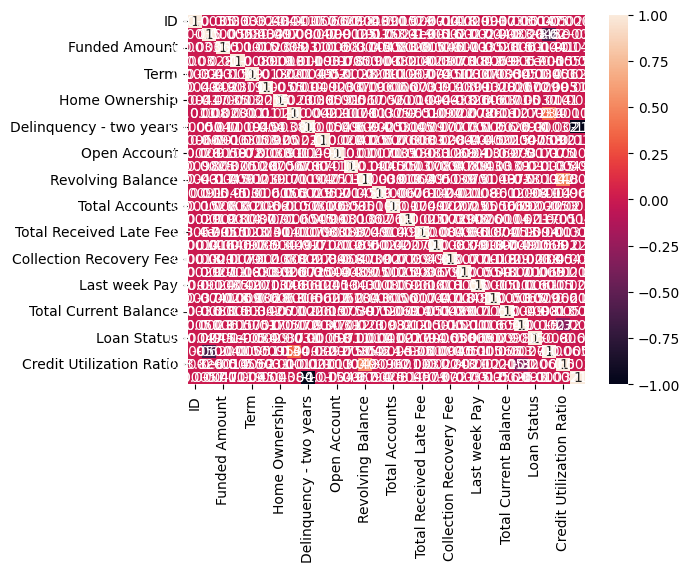

In [20]:
sns.heatmap(corr_matrix,annot=True)
plt.show()